# Introduction

This notebook demonstrates common usages of the `fdhpy` package. The package implements the following *fault displacement models* in Python:

- The Youngs et al. (2003) model (https://doi.org/10.1193/1.1542891).
- The Petersen et al. (2011) model (https://doi.org/10.1785/0120100035).
- The Moss and Ross (2011) model (https://doi.org/10.1785/0120100248).
- The Lavrentiadis & Abrahamson model (https://doi.org/10.1177/87552930231201531).
- The Moss et al. (2024) model (https://doi.org/10.1177/87552930241288560).
- The Kuehn et al. (2024) model (https://doi.org/10.1177/87552930241291077).
- The Chiou et al. (2025) model (DOI TBD).

# Overview

Each fault displacement model is represented by its own class and can be instantiated with appropriate parameters.

The following properties are available for each model as calculated attributes of an instance:

- `displ_site` : Calculate deterministic scenario displacement in meters.
- `displ_avg` : Calculate average displacement (AD) in meters.
- `displ_max` : Calculate maximum displacement (MD) in meters.
- `displ_profile` : Calculate displacement profile in meters.
- `cdf` : Calculate probability that the displacement is less than or equal to a specific value.
- `prob_exceed` : Calculate probability that the displacement exceeds a specific value.

Only one scenario (e.g., magnitude&mdash;x/L) is permitted. In other words, the user will need to loop over the function to consider multiple cases.

# Import libraries

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import fdhpy

# Help

In [2]:
# View the Quick Usage Guide
print(fdhpy.__quickstart__)


fdhpy Quick Usage Guide

Usage instructions for both CLI and module-level interactions with the `fdphy` package:

-----------------------------------
Available Models as Package Modules
-----------------------------------

The following fault displacement models are currently available and may be accessed as separate
modules in the `fdphy` package:

- YoungsEtAl2003 : The Youngs et al. (2003) model (https://doi.org/10.1193/1.1542891).
- PetersenEtAl2011 : The Petersen et al. (2011) model (https://doi.org/10.1785/0120100035).
- MossRoss2011 : The Moss and Ross (2011) model (https://doi.org/10.1785/0120100248).
- LavrentiadisAbrahamson2023: The Lavrentiadis & Abrahamson model
  (https://doi.org/10.1177/87552930231201531).
- MossEtAl2024 : The Moss et al. (2024) model (https://doi.org/10.1177/87552930241288560).
- KuehnEtAl2024 : The Kuehn et al. (2024) model (https://doi.org/10.1177/87552930241291077).
- ChiouEtAl2025 : The Chiou et al. (2025) model (DOI TBD).

--------------------
Avai

In [3]:
# View documentation for a specific model
print(fdhpy.ChiouEtAl2025.__doc__)


    Chiou et al. (2025) fault displacement model. Applicable to sum-of-principal surface fault
    displacement on strike-slip faults.

    Parameters
    ----------
    style : str, optional
        Style of faulting (case-insensitive). Default is "strike-slip".

    magnitude : float
        Earthquake moment magnitude. Recommended range is (6, 8.3).

    xl : float
        Normalized location x/L along the rupture length, range [0, 1.0].

    xl_step : float, optional
        Step size increment for slip profile calculations. Default is 0.05.

    percentile : float
        Aleatory quantile of interest. Use -1 for mean.

    metric : str, optional
        Definition of displacement (case-insensitive). Valid options are "sum-of-principal".
        Default is "sum-of-principal".

    version : str, optional
        Name of the model formulation (case-insensitive). Valid options are "model7", "model8.1",
        "model8.2", or "model8.3". Default is "model7".

    displ_array : np.nd

# Site displacement example

In [4]:
print(fdhpy.KuehnEtAl2024.displ_site.__doc__)


        Calculate deterministic scenario displacement in meters.

        Parameters
        ----------
        style : str
            Style of faulting (case-insensitive). Common options are 'strike-slip', 'reverse', or
            'normal'.

        magnitude : float
            Earthquake moment magnitude.

        xl : float
            Normalized location x/L along the rupture length, range [0, 1.0].

        percentile : float
            Aleatory quantile of interest. Use -1 for mean.

        metric : str
            Definition of displacement (case-insensitive), e.g. 'principal'. Varies by model. See
            model help for specifics.

        version : str
            Name of the model formulation for the given metric (case-insensitive), e.g. 'D/AD' or
            'median_coeffs'. Varies by model. See model help for specifics.

        Returns
        -------
        float
            Displacement in meters.

        Notes
        -----
        Parameters shown are typic

In [5]:
model = fdhpy.KuehnEtAl2024(magnitude=7, xl=0.3, style="reverse", percentile=0.84)
print(model.displ_site)

2.681510644477356


# Displacement profile example

In [6]:
print(fdhpy.ChiouEtAl2025.displ_profile.__doc__)


        Calculate the displacement profile at 'xl_step' increments.

        Parameters
        ----------
        style : str
            Style of faulting (case-insensitive). Common options are 'strike-slip', 'reverse', or
            'normal'.

        magnitude : float
            Earthquake moment magnitude.

        percentile : float
            Aleatory quantile of interest. Use -1 for mean.

        xl_step : float, optional
            Step size increment for slip profile calculations. Default is 0.05.

        metric : str
            Definition of displacement (case-insensitive), e.g. 'principal'. Varies by model. See
            model help for specifics.

        version : str
            Name of the model formulation for the given metric (case-insensitive), e.g. 'D/AD' or
            'median_coeffs'. Varies by model. See model help for specifics.

        Returns
        -------
        tuple of numpy.ndarray
            A tuple containing:

            - xl_array : nump

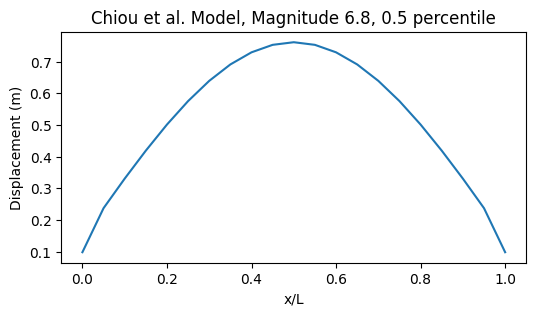

In [7]:
m, p = 6.8, 0.5
xl_array, displ = fdhpy.ChiouEtAl2025(magnitude=m, percentile=p).displ_profile

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(xl_array, displ)
ax.set_title(f"Chiou et al. Model, Magnitude {m}, {p} percentile")
ax.set_ylabel("Displacement (m)")
ax.set_xlabel("x/L");

# Average displacement example

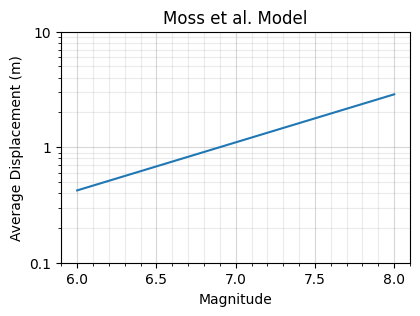

In [8]:
magnitudes = np.arange(6,8.1,.1)
results = [fdhpy.MossEtAl2024(magnitude=m, percentile=0.5).displ_avg for m in magnitudes]

fig, ax = plt.subplots(1,1, figsize=(4.5,3))
ax.semilogy(magnitudes, results)
ax.set_title("Moss et al. Model")
ax.set_ylabel("Average Displacement (m)")
ax.set_xlabel("Magnitude")

ax.set_yticks([0.1, 1, 10])
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
plt.minorticks_on()
ax.grid(which="major", axis="both", alpha=0.5)
ax.grid(which="minor", axis="both", alpha=0.25)

# Exceedance probability example

In [9]:
print(fdhpy.LavrentiadisAbrahamson2023.prob_exceed.__doc__)


        Calculate the probability that the displacement exceeds a specific value.

        Parameters
        ----------
        style : str
            Style of faulting (case-insensitive). Common options are 'strike-slip', 'reverse', or
            'normal'.

        magnitude : float
            Earthquake moment magnitude.

        xl : float
            Normalized location x/L along the rupture length, range [0, 1.0].

        displ_array : ArrayLike, optional
            Test values of displacement in meters. Default array is provided.

        metric : str
            Definition of displacement (case-insensitive), e.g. 'principal'. Varies by model. See
            model help for specifics.

        version : str
            Name of the model formulation for the given metric (case-insensitive), e.g. 'D/AD' or
            'median_coeffs'. Varies by model. See model help for specifics.

        Returns
        -------
        numpy.ndarray
            Exceedance probability.

    

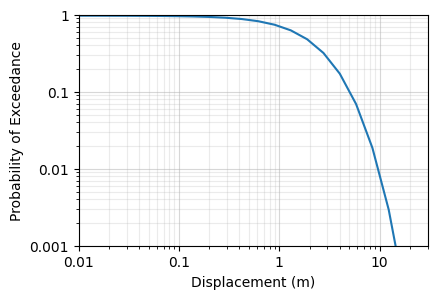

In [10]:
model = fdhpy.LavrentiadisAbrahamson2023(magnitude=7.2, xl=0.6, style="strike-slip", metric="aggregate")
default_displ = model.displ_array
pe = model.prob_exceed

fig, ax = plt.subplots(1,1, figsize=(4.5,3))
ax.loglog(default_displ, pe)
ax.set_ylabel("Probability of Exceedance")
ax.set_xlabel("Displacement (m)")

ax.set(xlim=[0.01, 30], ylim=[1e-3, 1])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
plt.minorticks_on()
ax.grid(which="major", axis="both", alpha=0.5)
ax.grid(which="minor", axis="both", alpha=0.25)